In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
covid_19_data= pd.read_csv("Data/covid_19_data.csv")
covid_19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## 1. What is the percentage of deaths from corona virus patients ?

In [6]:
percentage_of_death= (covid_19_data["Deaths"].sum()/covid_19_data["Confirmed"].sum())*100
print("{:.2f}% of COVID-19 patients died arround the world".format(percentage_of_death))

3.95% of COVID-19 patients died arround the world


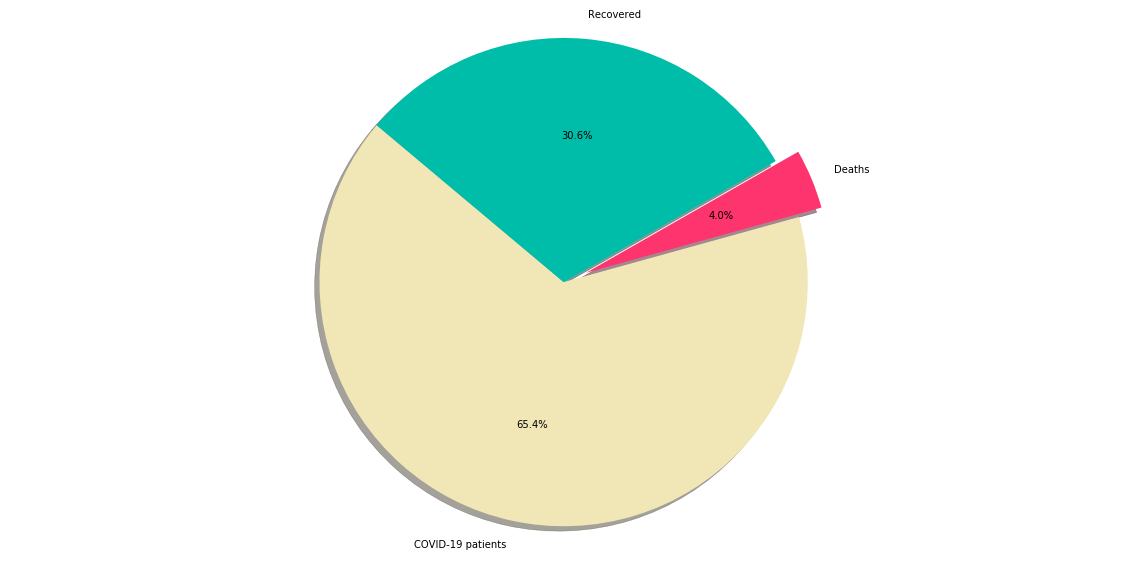

In [17]:
plt.figure(figsize=(20,10))

plt.style.use('ggplot')
covid_patients= covid_19_data["Confirmed"].sum() - covid_19_data["Deaths"].sum() - covid_19_data["Recovered"].sum()
covid_Deaths = covid_19_data["Deaths"].sum()
covid_recovered = covid_19_data["Recovered"].sum()

labels = 'COVID-19 patients', 'Deaths', 'Recovered'
sizes = [covid_patients, covid_Deaths, covid_recovered]
colors = ['#f1e7b6', '#fe346e','#00bdaa']
explode = (0, 0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels=labels,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### Death rates per age group

In [35]:
death_rate_per_age_group = age_df.groupby("age").sum()[["confirmed","deceased"]].reset_index()
death_rate_per_age_group["death_rate"]= np.around((death_rate_per_age_group["deceased"]/death_rate_per_age_group["confirmed"])*100, decimals=2)
death_rate_per_age_group

,age,confirmed,deceased,death_rate
0,0s,2323,0,0.00
1,10s,11733,0,0.00
2,20s,64417,0,0.00
3,30s,24071,29,0.12
4,40s,31760,29,0.09
5,50s,43718,196,0.45
6,60s,28661,432,1.51
7,70s,14412,802,5.56
8,80s,8276,922,11.14


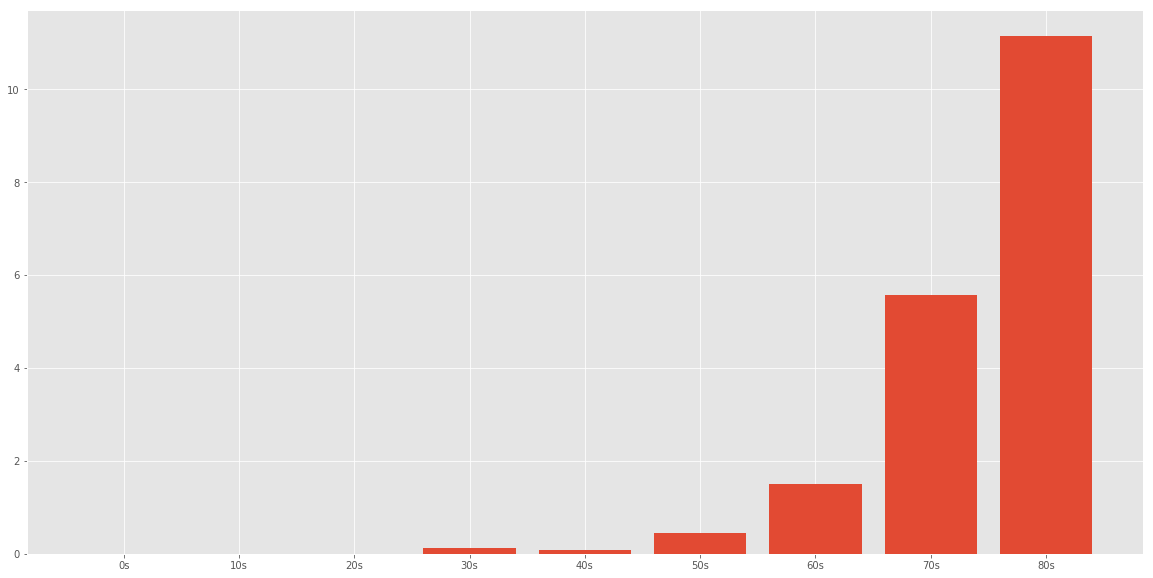

In [38]:
plt.figure(figsize=(20,10))
X = death_rate_per_age_group["age"]
Y = death_rate_per_age_group["death_rate"]

plt.bar(X,Y)
plt.show()

## 2. Is quarntien really helping using with keeping COVID-19 from spreading ?

In [22]:
spread_over_time = covid_19_data.groupby("ObservationDate").sum().sort_values("ObservationDate").reset_index()
spread_over_time.head()

,ObservationDate,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,741,555.0,17.0,28.0
1,01/23/2020,2829,653.0,18.0,30.0
2,01/24/2020,4305,941.0,26.0,36.0
3,01/25/2020,6490,1438.0,42.0,39.0
4,01/26/2020,9071,2118.0,56.0,52.0


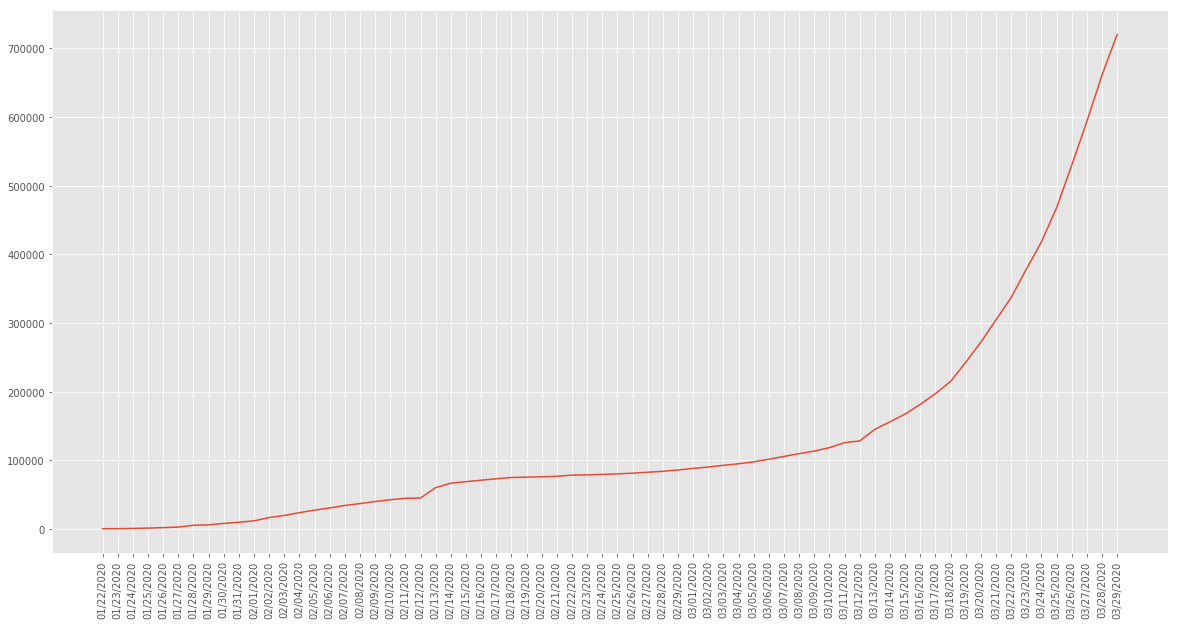

In [24]:
plt.figure(figsize=(20,10))
X = spread_over_time["ObservationDate"]
Y = spread_over_time["Confirmed"]

plt.plot(X,Y)
plt.xticks(rotation=90)
plt.show()

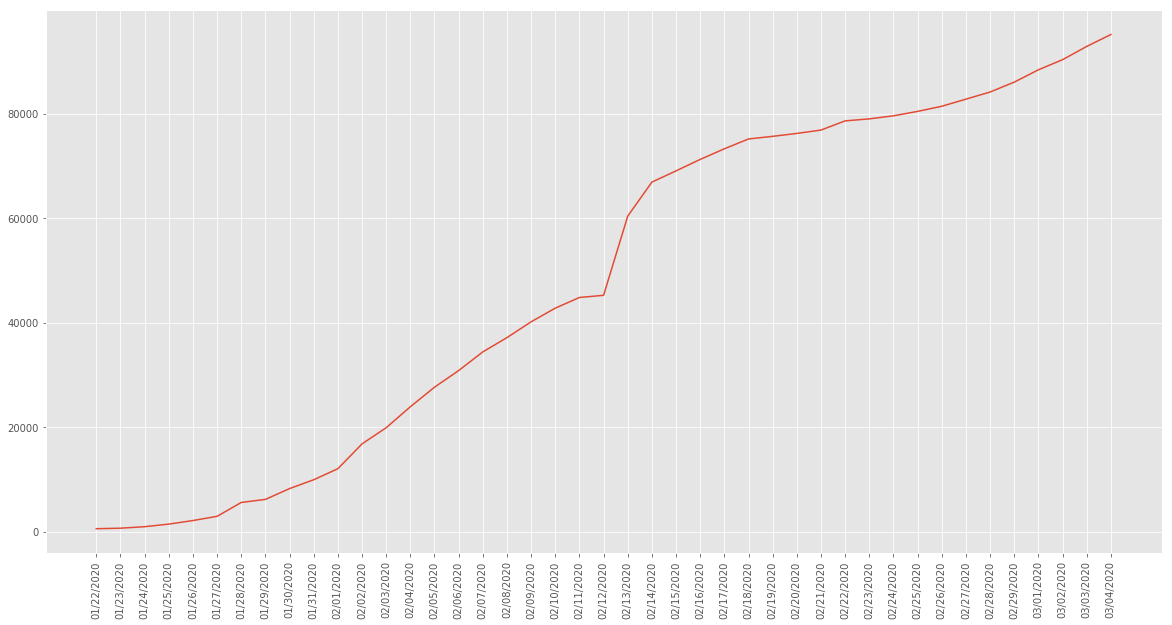

In [25]:
plt.figure(figsize=(20,10))
last_n_days =25
X = spread_over_time["ObservationDate"].tolist()[:-last_n_days]
Y = spread_over_time["Confirmed"].tolist()[:-last_n_days]

plt.plot(X,Y)
plt.xticks(rotation=90)
plt.show()

Quarntien and precatunary actions looks like they are doing a great job from keeping COVID-19 from spreading. Before quarntien the spread looked like an exponential function. This looked disasterous. But after quarntien the graph plataued decreasing spread drastically. 

## See Egypt quartntien effect

## 3.Which age group gets COVID-19 the most ?

In [26]:
age_df = pd.read_csv("Data2/TimeAge.csv")
age_df.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [27]:
age_df.sort_values("date",inplace=True)


,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


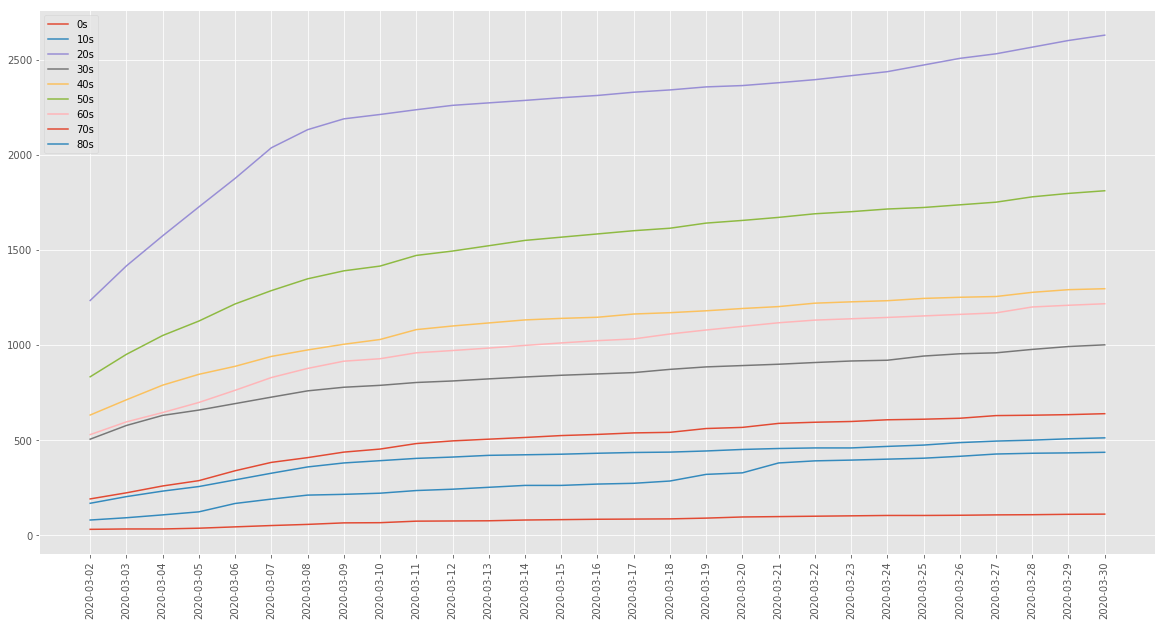

In [29]:
plt.figure(figsize=(20,10))
for age in age_df["age"].unique():
    filtered_age = age_df[age_df["age"]==age]
    X= filtered_age["date"]
    Y= filtered_age["confirmed"]
    
    plt.plot(X,Y,label=str(age))

plt.legend()
plt.xticks(rotation=90)
plt.show()

It looks like people in their 20s are the most people who gets affected by COVID-19. while little children between ages of 0 to 10 are the least that are getting affected. 

## 4. Average recovery time ?

In [39]:
recovery_time = pd.read_csv("Data2/PatientInfo.csv")
recovery_time.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [57]:
recovery_time['confirmed_date'] = pd.to_datetime(recovery_time['confirmed_date'])
recovery_time['released_date'] = pd.to_datetime(recovery_time['released_date'])
recovery_time['deceased_date'] = pd.to_datetime(recovery_time['deceased_date'])

In [103]:
filtered= recovery_time[recovery_time['released_date'].isnull()==False]
filtered= recovery_time[recovery_time['released_date'] > recovery_time['confirmed_date']]

filtered.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaT,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaT,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaT,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaT,released


In [106]:
filtered['recovery_time'] = filtered['released_date']-filtered['confirmed_date']

C:\Users\Abdullah\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
filtered['recovery_time'] = filtered['recovery_time'].apply(lambda x : x.days)

C:\Users\Abdullah\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
filtered['recovery_time'].mean()

18.439265536723163

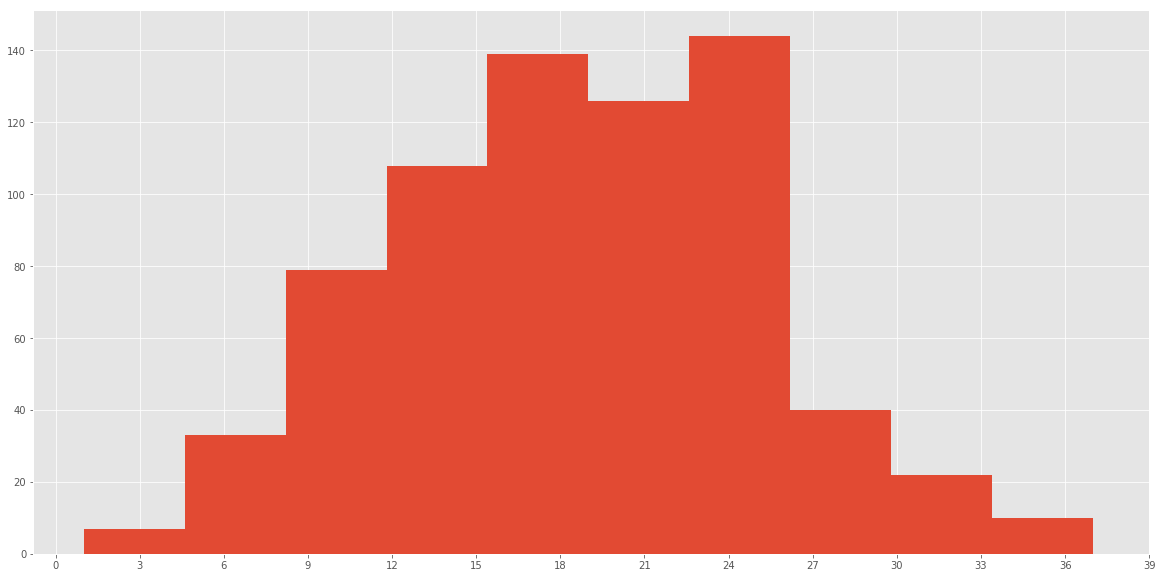

In [110]:
X = filtered['recovery_time']

plt.figure(figsize=(20,10))
plt.hist(X)
plt.xticks(ticks=range(0,40,3))
plt.show()

### Average recovery time per age group?

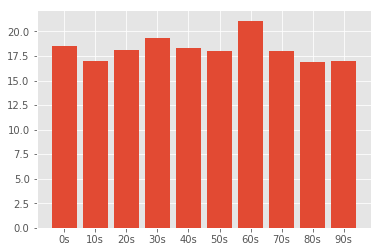

In [117]:
recovery_time_per_age = filtered.groupby("age").mean()["recovery_time"].reset_index()

X = recovery_time_per_age["age"]
Y = recovery_time_per_age["recovery_time"]

plt.bar(X,Y)
plt.show()

> The data does not show that there is much difference in recovery time between age groups

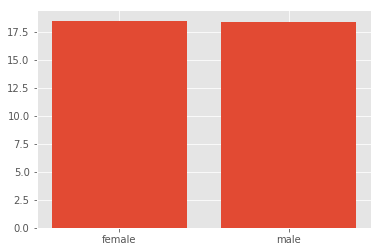

In [119]:
recovery_time_per_sex = filtered.groupby("sex").mean()["recovery_time"].reset_index()

X = recovery_time_per_sex["sex"]
Y = recovery_time_per_sex["recovery_time"]

plt.bar(X,Y)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX4AAAD8CAYAAABw1c+bAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAFQ5JREFUeJzt3X9sVXf9x/HX5TIo5dLu9pYfXqAO0GUrASq2YoC5blxIIzqJ1i5bZDFLxkhxBFSUEiMuULysVAhbGxEry3RRcGEbupnhHQKGjcAoPzYwg+qmmA66cuG2hdZ5ez/fP5bd7+q9d4VzL23h83z8dc85n3PO+yZvXv3cD/eHyxhjBACwxqD+LgAA0LcIfgCwDMEPAJYh+AHAMgQ/AFiG4AcAyxD8AGAZgh8ALEPwA4BlCH4AsMzg/i4glebm5v4u4YaXn5+v1tbW/i4D+ET0aWb4/f6rHsuMHwAsQ/ADgGUIfgCwDMEPAJYh+AHAMgQ/AFiG4AcAyxD8AGAZgh8ALDNgP7nrVPcj9/V3CQPG+f4uYIBxb93V3yUAA8JNF/zAQMfkpCcmKP+vryYnLPUAgGUIfgCwDMEPAJYh+AHAMgQ/AFim13f11NfXq7GxUbm5uaqtrZUkbdy4Mf5DKVeuXFF2drZqamoSzl2yZImysrI0aNAgud1uBYPBDJcPALhWvQZ/aWmpysrKVFdXF9+3fPny+ONnnnlG2dnZKc9fvXq1cnJy0iwTAJApvS71FBYWyuPxJD1mjNHrr7+uWbNmZbwwAMD1kdYHuP72t78pNzdXn/rUp1KOqa6uliTNnTtXgUAgndsBADIgreA/cODAJ87216xZo7y8PEUiEa1du1Z+v1+FhYVJx4ZCIYVCIUlSMBhUfn6+o5r4FCBScdpTmUaPIpW+6lHHwd/d3a1Dhw594n/Y5uXlSZJyc3NVUlKipqamlMEfCAR6vCJobW11WhqQFD2FgS6dHvX7/Vc91vHbOd988035/X75fL6kx7u6utTZ2Rl/fOLECRUUFDi9HQAgQ3qd8W/atEmnTp1Se3u7Fi9erIqKCt17771Jl3nC4bC2bNmiqqoqRSIRbdiwQdKHrw5mz56toqKi6/MsAABXzWWMMf1dRDIffU7gWvHNh0hloHwtMz2KVNLp0T5Z6gEA3JgIfgCwDMEPAJYh+AHAMgQ/AFiG4AcAyxD8AGAZgh8ALEPwA4BlCH4AsAzBDwCWIfgBwDIEPwBYhuAHAMsQ/ABgGYIfACxD8AOAZQh+ALAMwQ8Alun1x9br6+vV2Nio3Nxc1dbWSpJ27NihV199VTk5OZKkBx54QNOnT08499ixY9q2bZtisZjmzJmjBQsWZLh8AMC16jX4S0tLVVZWprq6uh7758+fr/vuS/2j0bFYTA0NDfrRj34kn8+nqqoqFRcXa9y4celXDQBwrNelnsLCQnk8nmu+cFNTk8aMGaPRo0dr8ODBmjlzpg4fPuyoSABA5vQ640/llVde0f79+zVx4kQ99NBDCX8cwuGwfD5ffNvn8+nMmTPOKwUAZISj4J83b57Ky8slSdu3b9czzzyjysrKHmOMMQnnuVyulNcMhUIKhUKSpGAwqPz8fCel6byjs2ADpz2VafQoUumrHnUU/Lfeemv88Zw5c7R+/fqEMT6fTxcuXIhvX7hwQV6vN+U1A4GAAoFAfLu1tdVJaUBK9BQGunR61O/3X/VYR2/nvHjxYvzxoUOHNH78+IQxkyZN0nvvvaeWlhZFo1G99tprKi4udnI7AEAG9Trj37Rpk06dOqX29nYtXrxYFRUVOnnypN599125XC6NHDlSixYtkvThuv6WLVtUVVUlt9uthx9+WNXV1YrFYrrnnnuS/oEAAPQtl0m2GD8ANDc3Ozqv+5HUbzGF3dxbd/V3CZLoUaSWTo9e96UeAMCNi+AHAMsQ/ABgGYIfACxD8AOAZQh+ALAMwQ8AliH4AcAyBD8AWIbgBwDLEPwAYBmCHwAsQ/ADgGUIfgCwDMEPAJYh+AHAMgQ/AFiG4AcAyxD8AGCZXn9svb6+Xo2NjcrNzVVtba0k6de//rWOHDmiwYMHa/To0aqsrNTw4cMTzl2yZImysrI0aNAgud1uBYPBzD8DAMA16TX4S0tLVVZWprq6uvi+qVOn6sEHH5Tb7dZvfvMbPf/88/rWt76V9PzVq1crJycncxUDANLS61JPYWGhPB5Pj33Tpk2T2+2WJN1+++0Kh8PXpzoAQMb1OuPvzZ49ezRz5syUx6urqyVJc+fOVSAQSPd2AIA0pRX8O3fulNvt1l133ZX0+Jo1a5SXl6dIJKK1a9fK7/ersLAw6dhQKKRQKCRJCgaDys/Pd1TTeUdnwQZOeyrT6FGk0lc96jj49+7dqyNHjujHP/6xXC5X0jF5eXmSpNzcXJWUlKipqSll8AcCgR6vCFpbW52WBiRFT2GgS6dH/X7/VY919HbOY8eO6cUXX9QPf/hDDR06NOmYrq4udXZ2xh+fOHFCBQUFTm4HAMigXmf8mzZt0qlTp9Te3q7FixeroqJCzz//vKLRqNasWSNJ+uxnP6tFixYpHA5ry5YtqqqqUiQS0YYNGyRJ3d3dmj17toqKiq7vswEA9MpljDH9XUQyzc3Njs7rfuS+DFeCm4V7667+LkESPYrU0unR677UAwC4cRH8AGAZgh8ALEPwA4BlCH4AsAzBDwCWIfgBwDIEPwBYhuAHAMsQ/ABgGYIfACxD8AOAZQh+ALAMwQ8AliH4AcAyBD8AWIbgBwDLEPwAYBmCHwAs0+uPrUtSfX29GhsblZubq9raWklSR0eHNm7cqPfff18jR47U8uXL5fF4Es7du3evdu7cKUn6+te/rtLS0sxVDwC4Zlc14y8tLdWqVat67HvhhRc0ZcoUbd68WVOmTNELL7yQcF5HR4eee+45rVu3TuvWrdNzzz2njo6OzFQOAHDkqoK/sLAwYTZ/+PBh3X333ZKku+++W4cPH04479ixY5o6dao8Ho88Ho+mTp2qY8eOZaBsAIBTjtf4I5GIvF6vJMnr9aqtrS1hTDgcls/ni2/n5eUpHA47vSUAIAOuao0/k1wuV9L9oVBIoVBIkhQMBpWfn+/o+ucdV4abndOeyjR6FKn0VY86Dv7c3FxdvHhRXq9XFy9eVE5OTsKYvLw8nTp1Kr4dDodVWFiY9HqBQECBQCC+3dra6rQ0ICl6CgNdOj3q9/uveqzjpZ7i4mLt27dPkrRv3z6VlJQkjCkqKtLx48fV0dGhjo4OHT9+XEVFRU5vCQDIgKua8W/atEmnTp1Se3u7Fi9erIqKCi1YsEAbN27Unj17lJ+fr+9+97uSpL///e/685//rMWLF8vj8egb3/iGqqqqJEnl5eVJ3/IJAOg7LmOM6e8ikmlubnZ0Xvcj92W4Etws3Ft39XcJkuhRpJZOj/bJUg8A4MZE8AOAZQh+ALAMwQ8AliH4AcAyBD8AWIbgBwDLEPwAYBmCHwAsQ/ADgGUIfgCwDMEPAJYh+AHAMgQ/AFiG4AcAyxD8AGAZgh8ALEPwA4BlCH4AsMxV/dh6Ms3Nzdq4cWN8u6WlRRUVFZo/f35838mTJ/XEE09o1KhRkqQZM2aovLw8jXIBAOlyHPx+v181NTWSpFgspkcffVRf+MIXEsbdeeedWrlypfMKAQAZlZGlnjfffFNjxozRyJEjM3E5AMB15HjG/3EHDhzQrFmzkh47ffq0VqxYIa/Xq4ULF2r8+PGZuCUAwKG0gz8ajerIkSN68MEHE45NmDBB9fX1ysrKUmNjo2pqarR58+ak1wmFQgqFQpKkYDCo/Px8R/Wcd3QWbOC0pzKNHkUqfdWjaQf/0aNHNWHCBN16660Jx7Kzs+OPp0+froaGBrW1tSknJydhbCAQUCAQiG+3tramWxrQAz2FgS6dHvX7/Vc9Nu01/k9a5rl06ZKMMZKkpqYmxWIxjRgxIt1bAgDSkNaM/z//+Y9OnDihRYsWxfft3r1bkjRv3jwdPHhQu3fvltvt1pAhQ7Rs2TK5XK70KgYApMVlPpqSDzDNzc2Ozut+5L4MV4KbhXvrrv4uQRI9itTS6dE+XeoBANxYCH4AsAzBDwCWIfgBwDIEPwBYhuAHAMsQ/ABgGYIfACxD8AOAZQh+ALAMwQ8AliH4AcAyBD8AWIbgBwDLEPwAYBmCHwAsQ/ADgGUIfgCwDMEPAJZJ68fWJWnJkiXKysrSoEGD5Ha7FQwGexw3xmjbtm06evSohg4dqsrKSk2cODHd2wIAHEo7+CVp9erVysnJSXrs6NGjOnfunDZv3qwzZ87ol7/8pdatW5eJ2wIAHLjuSz1vvPGGvvSlL8nlcun222/X5cuXdfHixet9WwBAChmZ8VdXV0uS5s6dq0Ag0ONYOBxWfn5+fNvn8ykcDsvr9Wbi1gCAa5R28K9Zs0Z5eXmKRCJau3at/H6/CgsL48eNMQnnuFyuhH2hUEihUEiSFAwGe/yxuBbnHZ0FGzjtqUyjR5FKX/Vo2sGfl5cnScrNzVVJSYmampp6BL/P51Nra2t8+8KFC0ln+4FAoMerhY+fA2QCPYWBLp0e9fv9Vz02rTX+rq4udXZ2xh+fOHFCBQUFPcYUFxdr//79Msbo9OnTys7OZpkHAPpRWjP+SCSiDRs2SJK6u7s1e/ZsFRUVaffu3ZKkefPm6XOf+5waGxu1dOlSDRkyRJWVlelXDQBwzGWSLcIPAM3NzY7O637kvgxXgpuFe+uu/i5BEj2K1NLp0T5b6gEA3HgIfgCwDMEPAJYh+AHAMgQ/AFiG4AcAyxD8AGAZgh8ALEPwA4BlCH4AsAzBDwCWIfgBwDIEPwBYhuAHAMsQ/ABgGYIfACxD8AOAZQh+ALAMwQ8AlnH8Y+utra2qq6vTpUuX5HK5FAgE9OUvf7nHmJMnT+qJJ57QqFGjJEkzZsxQeXl5ehUDANLiOPjdbrcWLlyoiRMnqrOzUytXrtTUqVM1bty4HuPuvPNOrVy5Mu1CAQCZ4Xipx+v1auLEiZKkYcOGaezYsQqHwxkrDABwfTie8X9cS0uL3nnnHX3mM59JOHb69GmtWLFCXq9XCxcu1Pjx4zNxSwCAQ2kHf1dXl2pra/Xtb39b2dnZPY5NmDBB9fX1ysrKUmNjo2pqarR58+ak1wmFQgqFQpKkYDCo/Px8R/Wcd3QWbOC0pzKNHkUqfdWjaQV/NBpVbW2t7rrrLs2YMSPh+Mf/EEyfPl0NDQ1qa2tTTk5OwthAIKBAIBDfbm1tTac0IAE9hYEunR71+/1XPdbxGr8xRj//+c81duxYfeUrX0k65tKlSzLGSJKampoUi8U0YsQIp7cEAGSA4xn/22+/rf3796ugoEArVqyQJD3wwAPxv1jz5s3TwYMHtXv3brndbg0ZMkTLli2Ty+XKTOUAAEccB/8dd9yhHTt2fOKYsrIylZWVOb0FAOA64JO7AGAZgh8ALEPwA4BlCH4AsAzBDwCWIfgBwDIEPwBYhuAHAMsQ/ABgGYIfACxD8AOAZQh+ALAMwQ8AliH4AcAyBD8AWIbgBwDLEPwAYBmCHwAsQ/ADgGUc/+auJB07dkzbtm1TLBbTnDlztGDBgh7H//vf/+qpp57SP/7xD40YMULLli3TqFGj0ioYAJAexzP+WCymhoYGrVq1Shs3btSBAwf073//u8eYPXv2aPjw4XryySc1f/58Pfvss2kXDABIj+Pgb2pq0pgxYzR69GgNHjxYM2fO1OHDh3uMeeONN1RaWipJ+uIXv6i33npLxpi0CgYApMdx8IfDYfl8vvi2z+dTOBxOOcbtdis7O1vt7e1ObwkAyADHa/zJZu4ul+uax3wkFAopFApJkoLBoPx+v7PCXnrD2XlAX6FH0c8cz/h9Pp8uXLgQ375w4YK8Xm/KMd3d3bpy5Yo8Hk/S6wUCAQWDQQWDQacl4X+sXLmyv0sAekWf9j3HwT9p0iS99957amlpUTQa1Wuvvabi4uIeYz7/+c9r7969kqSDBw9q8uTJKWf8AIC+4Xipx+126+GHH1Z1dbVisZjuuecejR8/Xtu3b9ekSZNUXFyse++9V0899ZQee+wxeTweLVu2LJO1AwAccBneZnPTCoVCCgQC/V0G8Ino075H8AOAZfjKBgCwDME/gL388stavny5Nm/efF2uv2PHDu3ateu6XBtw4uTJk7yzrw+k9V09uL52796tVatW8f1GADKK4B+gfvGLX+j8+fNav369Zs2apXPnzuns2bPq7u7WN7/5TZWUlGjv3r06dOiQYrGYzp49q69+9auKRqPav3+/brnlFlVVVcnj8SgUCunVV19VNBrV6NGj9dhjj2no0KE97nfu3Dk1NDSora1NQ4cO1aOPPqqxY8f207PHjaylpUXr1q3THXfcoTNnzujTn/60SktL9fvf/16RSERLly6VJD399NP64IMPNGTIEFVWViZ8aLOrq0u/+tWvEvoeGWAwYFVWVppIJGKeffZZs2/fPmOMMR0dHWbp0qWms7PT/OUvfzHf+c53zJUrV0wkEjEPPfSQeeWVV4wxxmzbts388Y9/NMYY09bWFr/mb3/7W/Pyyy8bY4zZvn27efHFF40xxjz++OOmubnZGGPM6dOnzU9+8pM+e564uZw/f97cf//95p///Kfp7u42P/jBD0xdXZ2JxWLm0KFDZv369eby5csmGo0aY4w5fvy4qampMcYY89Zbb5mf/vSnxhiTsu+RPmb8N4ATJ07oyJEj+sMf/iBJ+uCDD9Ta2ipJmjx5soYNG6Zhw4YpOzs7/iG6goIC/etf/5IknT17Vr/73e90+fJldXV1adq0aT2u39XVpbfffls/+9nP4vui0WhfPDXcpEaNGqWCggJJ0vjx4zVlyhS5XC4VFBTo/fff15UrV1RXV6dz585J+vCT/f8rVd+PGzeu757ITYrgvwEYY/S9730v4aVwU1OTbrnllvj2oEGDNHjw4Pjjj/4x1dXVacWKFbrtttu0d+9enTx5ssd1YrGYhg8frpqamuv8TGCLj/ely+WKb7tcLsViMW3fvl2TJ0/WihUr1NLSoscffzzhGqn6HunjXT03gGnTpulPf/pT/Evv3nnnnWs6v6urS16vV9FoVH/9618TjmdnZ2vUqFF6/fXXJX34D+7dd99Nu24glStXrigvL0+S4l/r8r/S7Xukxoz/BlBeXq6nn35a3//+9yVJI0eOvKYvtrr//vu1atUqjRw5UgUFBers7EwYs3TpUm3dulU7d+5UNBrVrFmzdNttt2XqKQA9fO1rX1NdXZ1eeuklTZ48OemYdPseqfHJXQCwDEs9AGAZgh8ALEPwA4BlCH4AsAzBDwCWIfgBwDIEPwBYhuAHAMv8H+nATpJZsqKjAAAAAElFTkSuQmCC
plt.show()

> The data does not show that there is much difference in recovery time between sexes

# 5. which countires have the highest number of death from corona ?

In [120]:
covid_19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


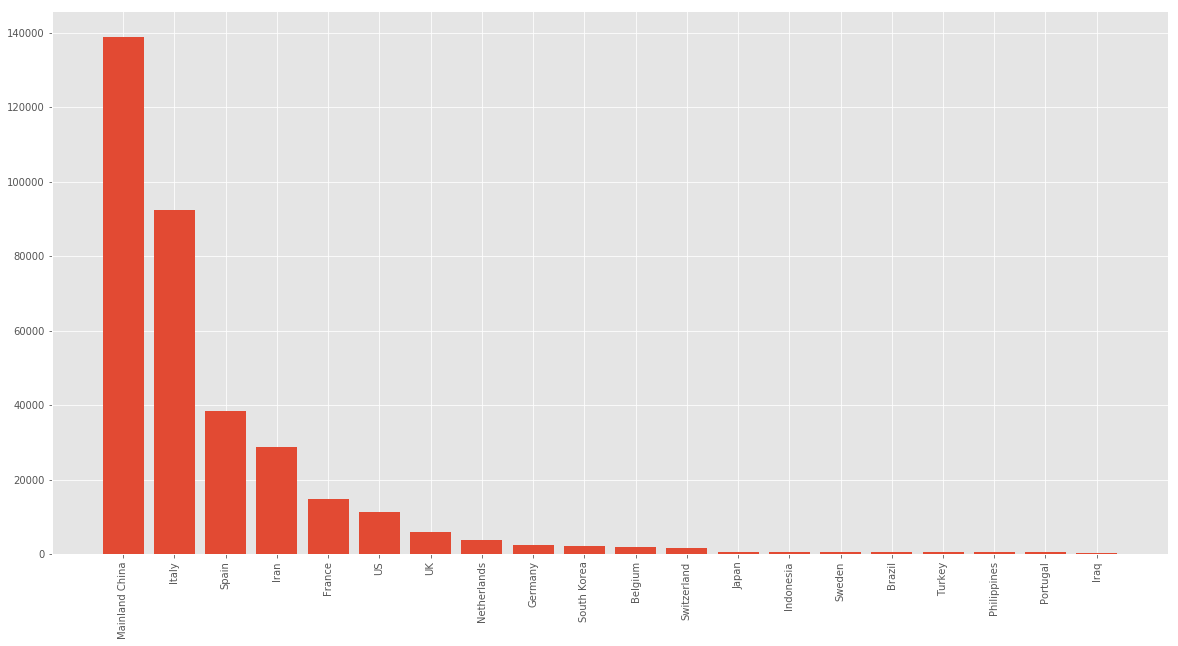

In [127]:
number_of_Death_by_country = covid_19_data.groupby("Country/Region").sum()["Deaths"].reset_index().sort_values("Deaths", ascending=False)
X= number_of_Death_by_country["Country/Region"][:20]
Y= number_of_Death_by_country["Deaths"][:20]

plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.xticks(rotation=90)
plt.show()


> The countries with the highest number of people who died from corona are China and Italy. 

# 6. which countries have the highest number of recovery rates ?

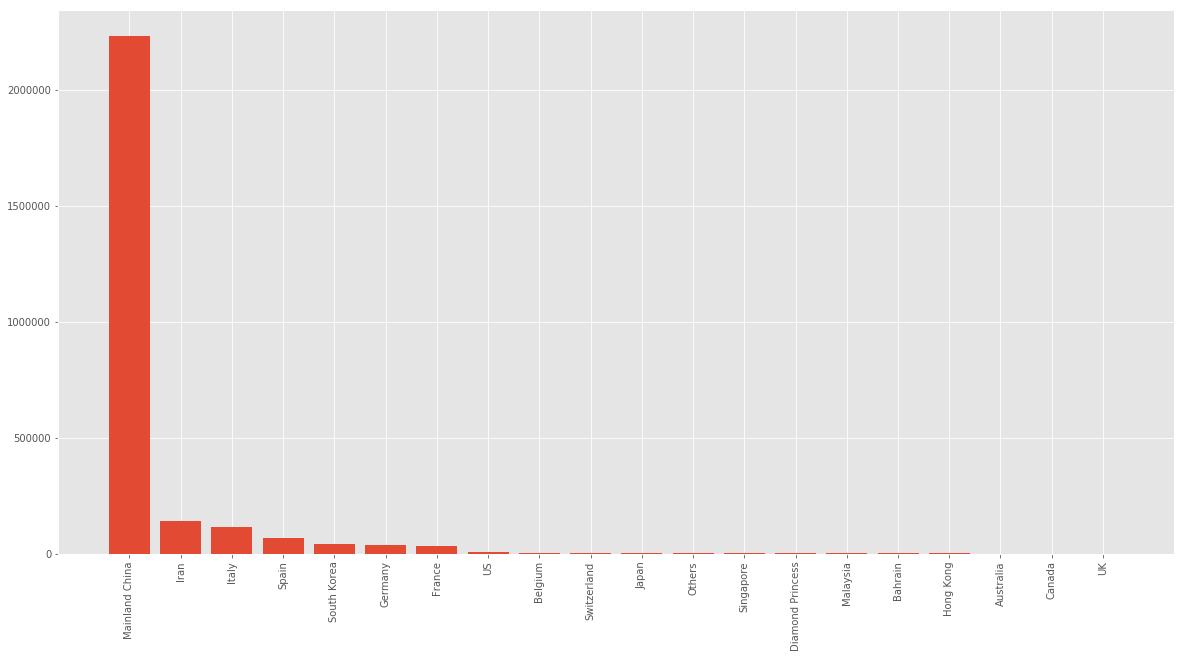

In [134]:
number_of_recoverd_by_country = covid_19_data.groupby("Country/Region").sum()[["Recovered","Confirmed"]].reset_index().sort_values("Recovered", ascending=False)
X= number_of_recoverd_by_country["Country/Region"][:20]
Y= number_of_recoverd_by_country["Recovered"][:20]

plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.xticks(rotation=90)
plt.show()


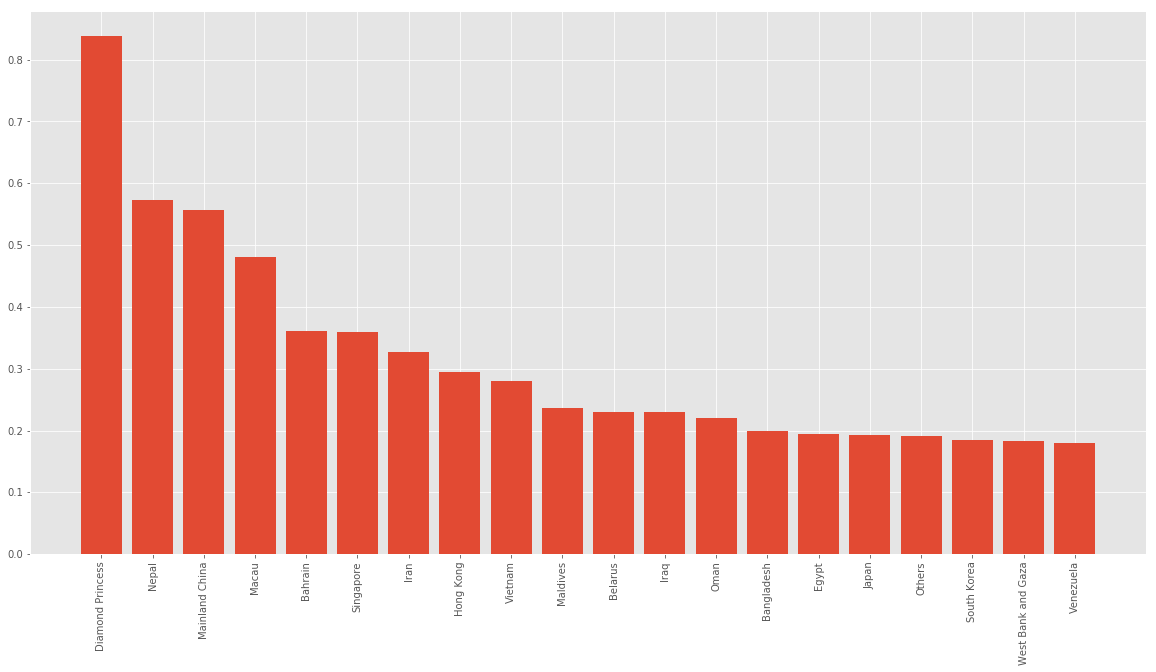

In [138]:
number_of_recoverd_by_country["recovery_rate"] = number_of_Death_by_country["Recovered"]/number_of_Death_by_country["Confirmed"]

number_of_recoverd_by_country.sort_values("recovery_rate", ascending=False, inplace=True)

X= number_of_recoverd_by_country["Country/Region"][:20]
Y= number_of_recoverd_by_country["recovery_rate"][:20]

plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.xticks(rotation=90)
plt.show()